In [559]:
import pickle
import pandas as pd


fileList = ["/home/mscha/freeboard_db.pkl", "/home/mscha/humordata_db.pkl", "/home/mscha/star_db_saved.pkl", "/home/mscha/sisa_db.pkl"]

with open(fileList[0],"rb") as f :
    freeboard = pickle.load(f)

with open(fileList[1],"rb") as f :
    humordata = pickle.load(f)

with open(fileList[2],"rb") as f :
    star = pickle.load(f)

with open(fileList[3],"rb") as f :
    sisa = pickle.load(f)
    
df = pd.DataFrame.from_dict(sisa)
df_humordata = pd.DataFrame.from_dict(humordata)
df_freeboard = pd.DataFrame.from_dict(freeboard)
df_star = pd.DataFrame.from_dict(star)
df

,contentID,writerName,writerSignInDate,writerVisitingCount,recommendCount,viewCount,memoCount,postTime,normalPostCount,bestPostCount,...,prohibitBoninOption,prohibitOutsidePermOption,imgCount,videoCount,youtubeCount,textLineCount,bestTime,BoBTime,okTime,memoTime
0,sisa_769432,義士김재규,2016-01-07,152,12,1333,2,2016/10/25 16:51:46,42,10,...,False,False,0,0,0,2,0,0,"[39.0, 77.0, 346.0, 398.0, 459.0, 624.0, 1009....","[198.0, 467.0, 669.0]"
1,sisa_781577,무지개지킴이,2015-05-13,499,5/4,369,9,2016/11/08 21:46:40,28,3,...,False,False,0,0,0,22,0,0,"[83.0, 659.0, 1743.0, 2077.0, 2782.0]","[111.0, 166.0, 173.0, 212.0, 231.0, 695.0, 747..."
2,sisa_690960,또롱랑또,2015-11-10,376,1,424,23,2016/03/16 10:00:53,591,149,...,False,False,0,0,0,10,0,0,[3484.0],"[208.0, 215.0, 406.0, 432.0, 463.0, 483.0, 605..."
3,sisa_714400,디스이즈,2012-12-19,795,2,268,2,2016/04/13 19:33:12,41,3,...,False,False,0,0,0,13,0,0,"[82.0, 119.0]","[275.0, 785.0]"
4,sisa_781217,diogenes,2011-06-10,629,2,901,12,2016/11/08 12:52:27,1195,36,...,False,False,0,0,0,15,0,0,"[681.0, 936.0]","[68.0, 225.0, 248.0, 363.0, 456.0, 603.0, 618...."
5,sisa_652018,이매이매,2015-04-19,193,12,733,6,2016/01/19 00:33:14,21,9,...,False,False,3,0,0,24,2016-01-19 01:51:39,0,"[153.0, 515.0, 658.0, 988.0, 1262.0, 1407.0, 1...","[513.0, 1063.0, 1861.0, 4892.0, 10165.0, 11508..."
6,sisa_726245,뿔감춘악마,2015-12-17,230,2,318,1,2016/04/17 21:22:22,7,1,...,False,False,0,0,0,3,0,0,"[506.0, 1442.0]","[52.0, 396.0]"
7,sisa_670984,아영아♡,2015-05-13,489,1,435,4,2016/02/27 10:18:14,383,38,...,False,False,0,0,0,3,0,0,[64.0],"[61.0, 143.0, 247.0, 281.0, 288.0]"
8,sisa_659859,m2racle,2015-08-09,406,1/6,701,0,2016/02/06 13:37:46,22,4,...,False,False,0,0,0,4,0,0,[1264.0],[]
9,sisa_673211,좌파자유주의,2014-10-13,99,12,469,3,2016/02/29 01:14:55,27,10,...,False,False,0,0,0,6,2016-02-29 01:34:17,0,"[15.0, 16.0, 43.0, 108.0, 139.0, 168.0, 281.0,...","[177.0, 1360.0, 2198.0]"


In [560]:
df = df[df['writerVisitingCount'].str.contains('-') == False]

In [586]:
from datetime import datetime
import operator
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from scipy.stats.stats import pearsonr
from operator import truediv
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Index = ['contentID', 'writerName', 'writerSignInDate', 'writerVisitingCount',
       'recommendCount', 'viewCount', 'memoCount', 'postTime',
       'normalPostCount', 'bestPostCount', 'BOBPostCount', 'board', 'title',
       'changjakOption', 'permOption', 'prohibitBestOption',
       'prohibitBOBOption', 'prohibitBoninOption', 'prohibitOutsidePermOption',
       'imgCount', 'videoCount', 'youtubeCount', 'textLineCount', 'bestTime',
       'BoBTime', 'okTime', 'memoTime', 'okIn3600s', 'bad', 'good', 'rcmd',
       'memoIn3600s']

######### 15분 이전의 추천과 댓글
df['okIn900s'] = df.okTime.apply(lambda e : len(list(filter(lambda f: f<=900, e))))
df['memoIn900s'] = df.memoTime.apply(lambda e : len(list(filter(lambda f: f<=900, e))))

df['bad'] = df.recommendCount.apply(lambda e: e.split('/')[1] if '/' in e else 0)
df['good'] = df.recommendCount.apply(lambda e: e.split('/')[0] if '/' in e else e)
df['rcmd'] = df.recommendCount.apply(lambda e: e.split('/')[0] if '/' not in e else int(e.split('/')[0]) - int(e.split('/')[1]))
df.drop('recommendCount', axis=1)


# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
X_ok = df['okIn900s']
X_memo = df['memoIn900s']
X_imgCount = df[df['imgCount']>0]['imgCount']
Y_imgCount = list(map(int, df[df['imgCount']>0]['rcmd'])) ## img가 들어간 게시물의 추천 수 
X_bestPostCount = list(map(int, df['bestPostCount']))
X_BOBPostCount = list(map(int, df['BOBPostCount']))
X_normalPostCount = list(map(int, df['normalPostCount']))
X_BOBratio = list(map(truediv,X_BOBPostCount, X_normalPostCount))
#df['BOBratio'] = list(map(truediv,X_BOBPostCount, X_normalPostCount))
X_bestratio = list(map(truediv,X_bestPostCount, X_normalPostCount))
X_textLineCount = list(map(int, df['textLineCount']))
#X_multimediaCount = df[]
Y_recommend = list(map(int, df['rcmd']))
#print(pearsonr(X_ok,Y), pearsonr(X_memo,Y), pearsonr(X_imgCount,Y), pearsonr(X_imgCount,Y_imgCount)) ### 추천갯수와 최종 추천은 경향성이 있찌만 댓글은 경향성이 낮다.
#for row in zip(df.contentID, df.rcmd, df.memoIn3600s):
#    print (row)
# pearsonr(X_bestPostCount,Y_recommend) ## 0.1500
# pearsonr(X_BOBPostCount,Y_recommend) ##  0.1588
# pearsonr(X_normalPostCount,Y_recommend) ##  0.1138
# pearsonr(X_textLineCount, Y_recommend) # 0.00537
#pearsonr(X_ok,Y_recommend) # 15분 내에 추천수 0.7485
#pearsonr(X_BOBratro,Y_recommend)  # 0.40054
#len(df[df['bestTime'] != 0])/len(df) # 0.2133 sisa best ratio
#print(len(df_humordata[df_humordata['bestTime'] != 0])/len(df_humordata)) # 0.293 for 유머
#print(len(df_freeboard[df_freeboard['bestTime'] != 0])/len(df_freeboard)) # 0.029 for 자게
#print(len(df_star[df_star['bestTime'] != 0])/len(df_star)) # 0.48 for 연애

####### 시간대별로 나누는 과정 
df['postHour'] = df.postTime.apply(lambda e: e.split(' ')[1].split(':')[0])
df['timeZone'] = df.postHour.apply(lambda e: "morning" if int(e)>=3 and int(e)<9 else "noon" if int(e)>=9 and int(e)<15 else "evening" if int(e)>=15 and int(e)<21 else "night")
df_timeZone = pd.get_dummies(df['timeZone'])

######## 정규화 시키는 과정 scaler.fit(data).transform(data)로 정규화 
scaler = preprocessing.StandardScaler()

df['okIn900s_normalized'] = scaler.fit(df['okIn900s']).transform(df['okIn900s'])
df['BOBratio_normalized'] = scaler.fit(X_BOBratio).transform(X_BOBratio)
df['imgCount_normalized'] = scaler.fit(df['imgCount']).transform(df['imgCount'])
df['youtubeCount_normalized'] = scaler.fit(df['youtubeCount']).transform(df['youtubeCount'])
df['videoCount_normalized'] = scaler.fit(df['videoCount']).transform(df['videoCount'])
df['isBOB'] = df.BoBTime.apply(lambda e: True if e != 0 else False)
df['changjakOption_integered'] = df['changjakOption'].apply(lambda e : -1 if e==False else 1)
df['permOption_integered'] = df['permOption'].apply(lambda e : -1 if e==False else 1)
df['prohibitBestOption_integered'] = df['prohibitBestOption'].apply(lambda e : -1 if e==False else 1)
df['prohibitBOBOption_integered'] = df['prohibitBOBOption'].apply(lambda e : -1 if e==False else 1)
df['prohibitBoninOption_integered'] = df['prohibitBoninOption'].apply(lambda e : -1 if e==False else 1)
df['prohibitOutsidePermOption_integered'] = df['prohibitOutsidePermOption'].apply(lambda e : -1 if e==False else 1)

df['writerVisitingCount_normalized'] = scaler.fit(df['writerVisitingCount']).transform(df['writerVisitingCount'])
df['memoIn900s_normalized'] = scaler.fit(df['memoIn900s']).transform(df['memoIn900s'])
df['okIn900s_normalized'] = scaler.fit(df['okIn900s']).transform(df['okIn900s'])
df['imgCount_normalized'] = scaler.fit(df['imgCount']).transform(df['imgCount'])
df['youtubeCount_normalized'] = scaler.fit(df['youtubeCount']).transform(df['youtubeCount'])
df['videoCount_normalized'] = scaler.fit(df['videoCount']).transform(df['videoCount'])
df['normalPostCount_normalized'] = scaler.fit(df['normalPostCount']).transform(df['normalPostCount'])
df['bestPostCount_normalized'] = scaler.fit(df['bestPostCount']).transform(df['bestPostCount'])
df['BOBPostCount_normalized'] = scaler.fit(df['BOBPostCount']).transform(df['BOBPostCount'])
df['textLineCount_normalized'] = scaler.fit(df['textLineCount']).transform(df['textLineCount'])

df['changjakOption_integered'] = df['changjakOption'].apply(lambda e : 0 if e==False else 1)
df['permOption'] = df['permOption'].apply(lambda e : 0 if e==False else 1)
df['prohibitBestOption'] = df['prohibitBestOption'].apply(lambda e : 0 if e==False else 1)
df['prohibitBOBOption'] = df['prohibitBOBOption'].apply(lambda e : 0 if e==False else 1)
df['prohibitBoninOption'] = df['prohibitBoninOption'].apply(lambda e : 0 if e==False else 1)
df['prohibitOutsidePermOption'] = df['prohibitOutsidePermOption'].apply(lambda e : 0 if e==False else 1)
df['isBOB'] = df.BoBTime.apply(lambda e: True if e != 0 else False)


########  SVM
clf = svm.SVC()
df_new = pd.concat([df['okIn900s_normalized'],df['BOBratio_normalized'],df['imgCount_normalized'], df['youtubeCount_normalized'],
                    df['videoCount_normalized'], df['changjakOption_integered'], df['permOption'], df['prohibitBestOption'], df['prohibitBOBOption'], 
                    df['prohibitBoninOption'], df['prohibitOutsidePermOption'], df_timeZone], axis=1)
#df_new = pd.concat([df['writerVisitingCount_normalized'],df['memoIn900s_normalized'],df['imgCount_normalized'], #df['okIn900s_normalized'], 
#                         df['youtubeCount_normalized'], df['videoCount_normalized'], df['normalPostCount_normalized'], df['bestPostCount_normalized'],
#                    df['BOBPostCount_normalized'], df['textLineCount_normalized'], df['changjakOption_integered'], df['permOption'], df['prohibitBestOption'],
#                    df['prohibitBOBOption'], df['prohibitBoninOption'], df['prohibitOutsidePermOption'], df_timeZone], axis=1)



df_Y = df['isBOB']
X_train, X_test, y_train, y_test = train_test_split(df_new, df_Y, test_size=0.1, random_state=0)
clf.fit(X_train,y_train)

score = clf.score(X_test,y_test)
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test, y_predict), score)

#df_new = pd.concat([df,df_timeZone], axis = 1)

/home/muncok/venv/hcid/lib/python3.4/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/muncok/venv/hcid/lib/python3.4/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/muncok/venv/hcid/lib/python3.4/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

[[797  14]
 [ 69  43]] 0.910075839653


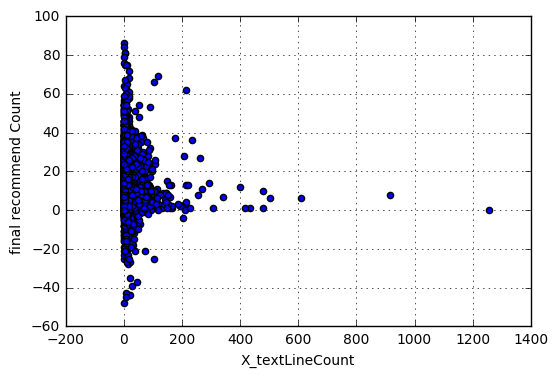

(0.008248322298612892, 0.42820883808921562)


In [563]:
from sklearn.model_selection import cross_val_predict

############# R value와 plot 그리기


# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
X_ok = df['okIn900s']
X_memo = df['memoIn900s']
X_imgCount = df[df['imgCount']>0]['imgCount']
Y_imgCount = list(map(int, df[df['imgCount']>0]['rcmd'])) ## img가 들어간 게시물의 추천 수 
X_bestPostCount = list(map(int, df['bestPostCount']))
X_BOBPostCount = list(map(int, df['BOBPostCount']))
X_normalPostCount = list(map(int, df['normalPostCount']))
X_BOBratio = list(map(truediv,X_BOBPostCount, X_normalPostCount))
#df['BOBratio'] = list(map(truediv,X_BOBPostCount, X_normalPostCount))
X_bestratio = list(map(truediv,X_bestPostCount, X_normalPostCount))
X_textLineCount = list(map(int, df['textLineCount']))
#X_multimediaCount = df[]
Y_recommend = list(map(int, df['rcmd']))
X_imgCount = list(map(int, df['imgCount']))
X_youtubeCount = list(map(int, df['youtubeCount']))
X_videoCount = list(map(int, df['videoCount']))
X_textLineCount = list(map(int, df['textLineCount']))

#predicted = cross_val_predict(regr, list(X_ok), Y_recommend, cv=10)
def plotAndR (data):
    fig, ax = plt.subplots()
    ax.scatter(data, Y_recommend)
    plt.xlabel('X_textLineCount')
    plt.ylabel('final recommend Count')
    plt.grid()
    plt.show()
    print(pearsonr(data,Y_recommend) )
plotAndR(X_textLineCount)

changjakOption 75 625
625
permOption 158 501
501
prohibitBestOption 0 86
86
prohibitBOBOption 0 21
21
prohibitBoninOption 10 167
167
prohibitOutsidePermOption 20 208
208


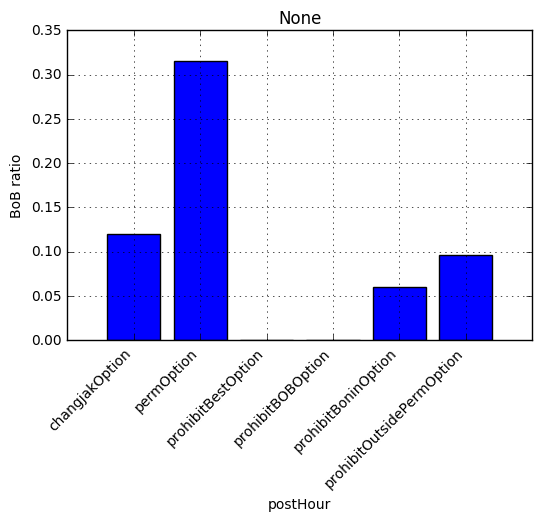

In [588]:
###########################################################
######## Binary feature에 대한 막대그래프 그리기 ##########
###########################################################


def barchart(data, labels, X_name = None, Y_name = None, Title = None):
    num_bars = len(data)
    positions = range(1, num_bars + 1)
    plt.bar(positions, data, align='center')
    plt.xticks(positions, labels, rotation=45, ha='right')
    plt.xlabel(X_name)
    plt.ylabel(Y_name)
    plt.title(Title)
    plt.grid()
    plt.show()

    
Options =  ['changjakOption', 'permOption', 'prohibitBestOption',
       'prohibitBOBOption', 'prohibitBoninOption', 'prohibitOutsidePermOption']
RecommendRatioPerHour = []
BOBRatioPerHour = []
RecommendCountPerOptions = []
BOBRatioPerOptions = []
for x in sorted(set(df['postHour'])):
    BOBRatioPerHour.append(len(df.query('postHour == @x & isBOB == True'))/len(df.query('postHour == @x')))
    RecommendRatioPerHour.append(len(df.query('postHour == @x')))
#    print('{} : {}'.format(x,len(df.query('postHour == @x & isBOB == True'))/len(df.query('postHour == @x'))))
#    print('{} : {}'.format(x, df.query("postHour == @x & isBOB == True")['contentID']))
for x in Options : 
    print('{} {} {}'.format(x, len(df[df[x]==True].query('isBOB == True')), len(df[df[x]==True])))
    print(len(df[df[x]==True]))
    BOBRatioPerOptions.append(len(df[df[x]==True].query('isBOB == True'))/len(df[df[x]==True]))
    RecommendCountPerOptions.append(len(df[df[x]==True]))

BoardName = ['sisa','humordata','freeboard', 'star']
BOBRatioPerBoard = [
    len(df[df['BoBTime'] !=0]) / len(df),
    len(df_humordata[df_humordata['BoBTime'] !=0]) / len(df_humordata),
    len(df_freeboard[df_freeboard['BoBTime'] !=0]) / len(df_freeboard),
    len(df_star[df_star['BoBTime'] !=0]) / len(df_star)
]
#fig, ax = plt.subplots()
#ax.scatter(sorted(set(df['postHour'])), temp)
#plt.show()
                                 
#barchart(temp,sorted(set(df['postHour'])), 'postHour', 'BoB ratio')
#barchart(RecommendRatioPerHour,sorted(set(df['postHour'])), 'postHour', 'post Count')
barchart(BOBRatioPerOptions, Options, 'postHour', 'BoB ratio')
#barchart(RecommendCountPerOptions, Options, 'postHour', 'post Count')
#barchart(BOBRatioPerBoard, BoardName, 'BoardName', 'BOB ratio')


In [595]:
############################################
####### SVM 하는 부분만 따로 추출 ##########
############################################

clf = svm.SVC()
df_new = pd.concat([df['okIn900s_normalized'],df['BOBratio_normalized'],  df['imgCount_normalized'], df['youtubeCount_normalized'],
                    df['videoCount_normalized']], axis=1)
#df_new = pd.concat([df['writerVisitingCount_normalized'],df['memoIn900s_normalized'],df['imgCount_normalized'], #df['okIn900s_normalized'], 
#                         df['youtubeCount_normalized'], df['videoCount_normalized'], df['normalPostCount_normalized'], df['bestPostCount_normalized'],
#                    df['BOBPostCount_normalized'], df['textLineCount_normalized'], df['changjakOption_integered'], df['permOption'], df['prohibitBestOption'],
#                    df['prohibitBOBOption'], df['prohibitBoninOption'], df['prohibitOutsidePermOption'], df_timeZone], axis=1)



df_Y = df['isBOB']
X_train, X_test, y_train, y_test = train_test_split(df_new, df_Y, test_size=0.1, random_state=0)
clf.fit(X_train,y_train)

score = clf.score(X_test,y_test)
y_predict = clf.predict(X_test)

print(confusion_matrix(y_test, y_predict), score)

[[797  14]
 [ 69  43]] 0.910075839653
